In [78]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from app.utils import DB

In [21]:
db = DB()

aksasdfsadfdjfa


In [63]:
plt.style.use("dark_background")

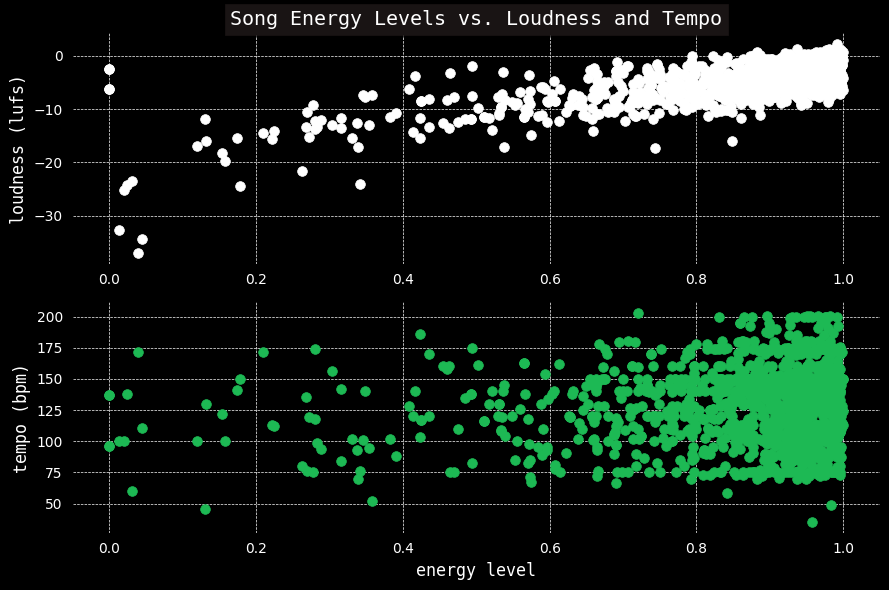

In [190]:
db.execute("SELECT * FROM track_features")
df = pd.DataFrame(db.result())
df.columns = ["track_id", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "type", "valence", "song_uri"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 6))

ax1.scatter(df["energy"], df["loudness"], c="#FFFFFF")
ax1.set_title("Song Energy Levels vs. Loudness and Tempo", fontname="monospace", backgroundcolor="#191414")
ax1.set_ylabel("loudness (lufs)", fontname="monospace")

ax2.scatter(df["energy"], df["tempo"], c="#1DB954")
ax2.set_xlabel("energy level", fontname="monospace")
ax2.set_ylabel("tempo (bpm)", fontname="monospace")

fig.tight_layout()

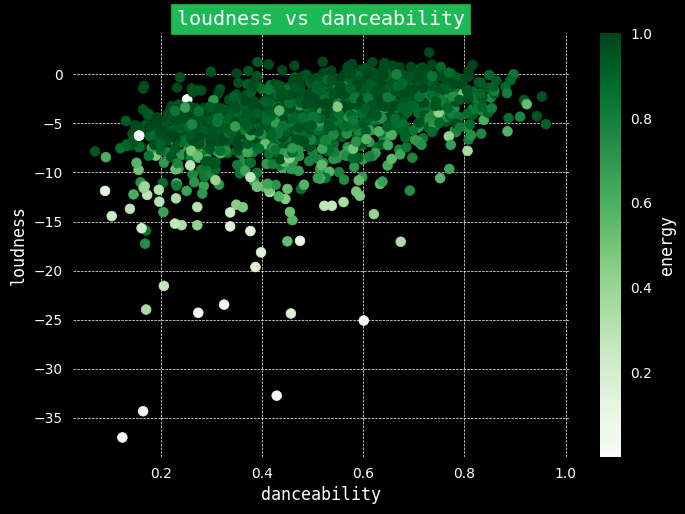

In [148]:
db.execute("SELECT * FROM track_features")
df = pd.DataFrame(db.result())
df.columns = ["track_id", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "type", "valence", "song_uri"]

plt.scatter(df["danceability"], df["loudness"], c=df["energy"], cmap="Greens")
cbar = plt.colorbar()
cbar.set_label("energy", fontname="monospace",)
plt.title("loudness vs danceability", fontname="monospace", backgroundcolor="#1DB954")
plt.xlabel("danceability", fontname="monospace")
plt.ylabel("loudness", fontname="monospace")
fig.tight_layout()

Text(0.5, 0, 'avg loudness')

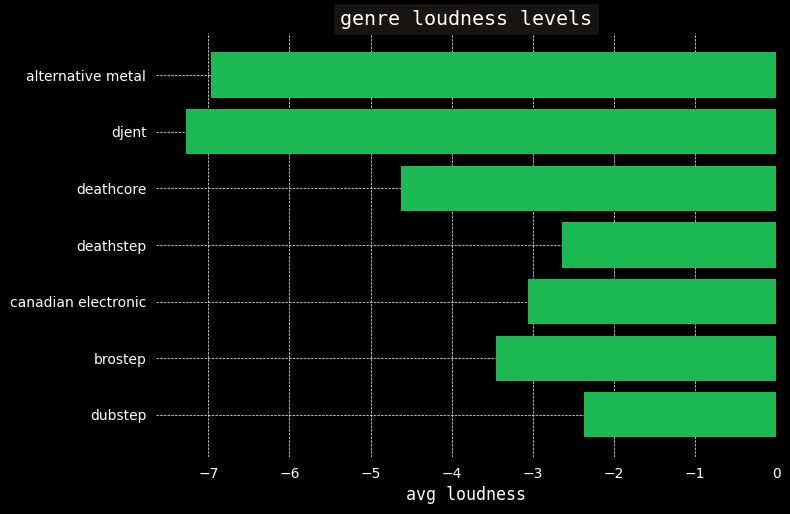

In [192]:
db.execute("SELECT * FROM V_genre_features")
df = pd.DataFrame(db.result())
df.columns = ["genre", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence"]

plt.barh(df["genre"], df["loudness"], color="#1DB954")
plt.title("genre loudness levels", fontname="monospace", backgroundcolor="#191414", color="#FFFFFF")
plt.xlabel("avg loudness", fontname="monospace")